 # Breast Cancer Dataset Classification

 ## 1. Data upload and first study

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import phik
import optuna
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import torch
import torch.nn as nn

In [10]:
# Data upload
df = pd.read_csv('/Users/macbook/Desktop/Yandex Mashine Learning/Kaggle/Breast Cancer Dataset/breast-cancer.csv.xls')

In [11]:
# First study
df = df.drop(['id'], axis=1)
display(df.info())
display(df.head(10))
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

None

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   
5         M        12.45         15.70           82.57      477.1   
6         M        18.25         19.98          119.60     1040.0   
7         M        13.71         20.83           90.20      577.9   
8         M        13.00         21.82           87.50      519.8   
9         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   
5         0.2087  ...         15.47          23.75           103.40   
6         0.1794  ...         22.88          27.66           153.20   
7         0.2196  ...         17.06          28.14           110.60   
8         0.2350  ...         15.49          30.73           106.20   
9         0.2030  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9                0.2210          0.4366                  0.20750  

[10 rows x 31 columns]

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

 ## 2. Analysis of data

 #### Build histogram for every column

In [14]:
# Building histogram
plt.figure(figsize=(100, 100)) # size's matrix of histogram
df_describe = df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] # choice all features
num_cols = 4 # Amount of columns
num_rows = (len(df_describe.columns) + num_cols - 1) // num_cols # Amount of ranges
total_plots = num_cols * num_rows # Size of matrix

def count_bin(col): # Function for a return of amount of bins
    return len(df_describe[col].unique()) if len(df_describe[col].unique())<10 else 15

# Using cycle we create a histogram of distribution for every column
for i, col in enumerate(df_describe.columns):
    plt.rcParams.update({'font.size': 50})  # Setting the size of type for title 
    plt.rcParams.update({'axes.labelsize': 50})  # Setting the size of type for axis 
    plt.subplot(num_rows, num_cols, i+1) # Choice histogram for "i" in matrix
    plt.hist(df_describe[col], bins=count_bin(col)) # Building histogram for every column
    plt.title(col) # Assignment title for every column
    plt.xlabel('Значение')
    plt.ylabel('Частота')

plt.tight_layout() # Starting the function for automatic regulation of elemnts
plt.show()

 #### Build box-plots for every numerical columns

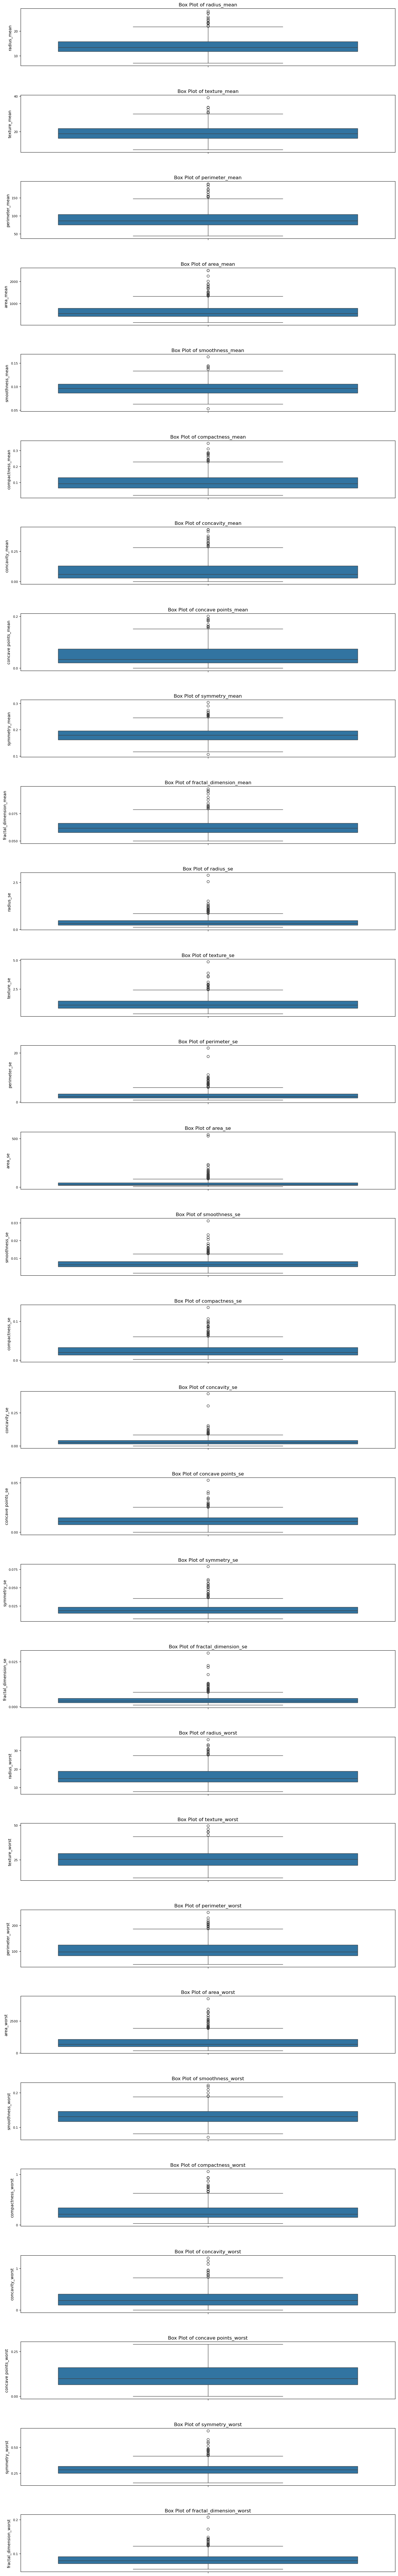

In [16]:
# Создание боксплотов для каждой числовой характеристики
numerical_features = df.select_dtypes(include=['number'])

# Определяем размер фигуры один раз
plt.figure(figsize=(15, len(numerical_features.columns) * 3))

# Создаем подграфики для каждого числового признака
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features.columns), 1, i + 1)  # Создаем подграфик
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}', fontsize=12)  # Размер шрифта заголовка
    plt.ylabel(feature, fontsize=10)  # Размер шрифта метки оси Y
    plt.xlabel('')  # Убираем метку оси X, если она не нужна
    
    # Увеличиваем размер шрифта меток на осях
    plt.xticks(fontsize=8)  # Размер шрифта меток на оси X
    plt.yticks(fontsize=8)  # Размер шрифта меток на оси Y

plt.tight_layout()  # Автоматически подгоняет подграфики
plt.show()

 #### Build a matrix of dependences for target

interval columns not set, guessing: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_2880/3340514354.py:9: SyntaxWarning: invalid escape sequence '\p'
  title='Корреляция $\phi_k$',


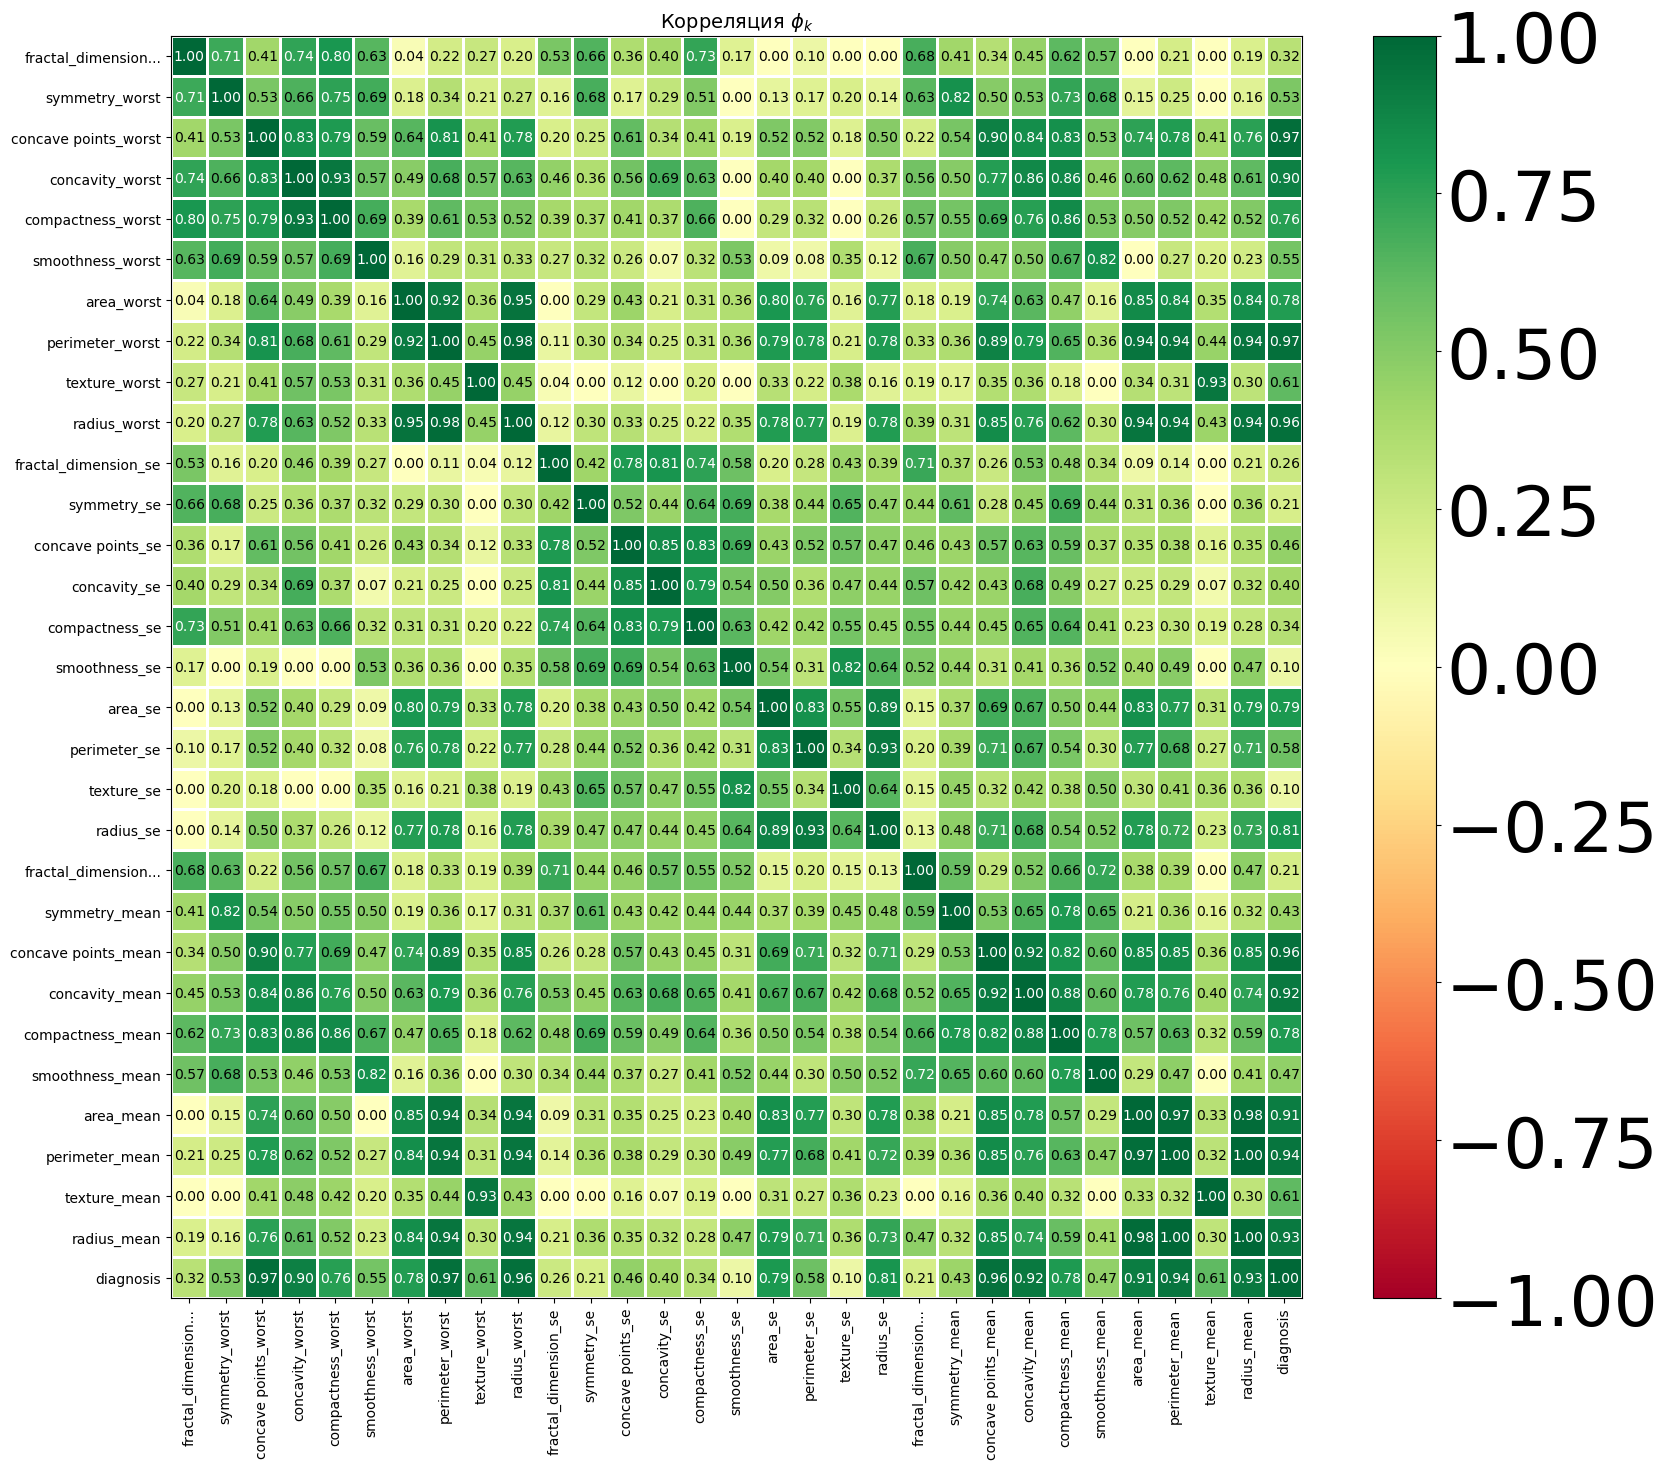

In [18]:
# Receive a correlation
phik_corr = df.phik_matrix()

# Build   
plot_correlation_matrix(
    phik_corr.values,
    x_labels=phik_corr.columns,
    y_labels=phik_corr.index,
    title='Корреляция $\phi_k$',
    identity_layout=True,
    figsize=(18, 16)
)


Conclusion: we observe a dependence "diagnosis" to a lot of columns, and indirect dependence between columns

In [20]:
# Replace B by 0 and M by 1
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

/var/folders/b4/mc0v_4c562xfny9p49bm920h0000gn/T/ipykernel_2880/1466757306.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


 ## Data preparation

 #### All our data is numerical, because we won't reform it

In [23]:
# Select a features and target
features = df.drop(['diagnosis'], axis=1)
target = df['diagnosis']

smote = SMOTE(random_state=42)

X, y = smote.fit_resample(features, target)


# Part a data for train and test
features_train, features_test, target_train, target_test = train_test_split(X, y, random_state=12345, test_size=0.2)

scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Check a target in train data and test data
print('Train data', target_train.value_counts())
print()
print('Test data', target_test.value_counts())

Train data diagnosis
1    286
0    285
Name: count, dtype: int64

Test data diagnosis
0    72
1    71
Name: count, dtype: int64


 #### Write the function for metrics

In [25]:
def metrics(predictions, target):
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    recall = recall_score(target, predictions)
    f1 = f1_score(target, predictions)
    roc = roc_auc_score(target, predictions)
    return {'accuracy': accuracy, 'precision': precision, 'recal': recall, 'f1': f1, 'roc': roc}

 #### Train LogisticRegression model 

In [27]:
max_iter = [50, 100, 150]                      
solvers = ['liblinear', 'newton-cg', 'lbfgs'] 
best_result = 0
logistic_regres, best_iter, best_solver = None, None, None

for iter in max_iter:
    for solver in solvers:
        model = LogisticRegression(class_weight='balanced', random_state=12345, max_iter=iter, solver=solver)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            logistic_regres = metrics(predictions, target_test)
            best_iter = iter
            best_solver = solver


print(f'The best parameters: max_iter={best_iter}, solver={best_solver}')
print('Test data', logistic_regres)

The best parameters: max_iter=150, solver=lbfgs
Test data {'accuracy': 0.965034965034965, 'precision': 0.9583333333333334, 'recal': 0.971830985915493, 'f1': 0.965034965034965, 'roc': 0.9650821596244132}


 #### Train DecisionTree Model

In [29]:
best_result = 0
best_depth = 0
dec_tree = None
for depth in range(1, 10):
    model = DecisionTreeClassifier(random_state = 12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions = model.predict(features_test)
    result = recall_score(target_test, predictions)
    #print(depth, result)
    if best_result < result:
        dec_tree = metrics(predictions, target_test)
        best_depth = depth
        best_result = result

print(f'The best parameters: depth={best_depth}')
print('Test data', dec_tree)

The best parameters: depth=6
Test data {'accuracy': 0.9020979020979021, 'precision': 0.8607594936708861, 'recal': 0.9577464788732394, 'f1': 0.9066666666666666, 'roc': 0.9024843505477308}


 #### Train Randomforest Model

In [31]:
best_result, best_depth, best_est = 0, 0, 0
rand_forest = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = RandomForestClassifier(random_state=12345, max_depth=depth, n_estimators=est, class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if best_result < result:
            rand_forest = metrics(predictions, target_test)
            best_depth = depth
            best_est = est
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', rand_forest)

The best parameters: depth=3, est=10
Test data {'accuracy': 0.9370629370629371, 'precision': 0.918918918918919, 'recal': 0.9577464788732394, 'f1': 0.9379310344827586, 'roc': 0.9372065727699531}


 #### Train KNeighborsClassifier model

In [33]:
best_result, best_n_neighbors, best_metric = 0, 0, ''
knn = None

# Перебор параметров
for n_neighbors in range(1, 21):  # Перебор от 1 до 20 соседей
    for metric in ['euclidean', 'manhattan', 'minkowski']:  # Разные метрики
        model = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)
        
        if best_result < result:
            knn = metrics(predictions, target_test)
            best_n_neighbors = n_neighbors
            best_metric = metric
            best_result = result

print(f'The best parameters: n_neighbors={best_n_neighbors}, metric={best_metric}')
print('Test data metrics:', knn)

The best parameters: n_neighbors=1, metric=euclidean
Test data metrics: {'accuracy': 0.9440559440559441, 'precision': 0.8987341772151899, 'recal': 1.0, 'f1': 0.9466666666666667, 'roc': 0.9444444444444444}


 #### Train XGBlassifier

In [35]:
best_result, best_depth, best_est, best_learning_rate = 0, 0, 0, 0

xgb = None
pos_weight = sum(target_train == 0) / sum(target_train == 1)

for est in range(10, 110, 10):
    for depth in range(1, 10):
        for learning_rate in [0.01, 0.1, 0.2]:  
            model = XGBClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                learning_rate=learning_rate,
                scale_pos_weight=pos_weight
            )
            model.fit(features_train, target_train)
            predictions = model.predict(features_test)
            result = recall_score(target_test, predictions)
            
            if best_result < result:
                xgb = metrics(predictions, target_test)
                best_depth = depth
                best_est = est
                best_learning_rate = learning_rate
                best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}, learning_rate={best_learning_rate}')
print('Best F1 Score:', xgb)

The best parameters: depth=6, est=10, learning_rate=0.2
Best F1 Score: {'accuracy': 0.9370629370629371, 'precision': 0.9078947368421053, 'recal': 0.971830985915493, 'f1': 0.9387755102040817, 'roc': 0.9373043818466353}


 #### Train LGBMregressor Model

In [37]:
best_est = 0
best_result = 0
best_depth = 0
lgbm = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = LGBMClassifier(random_state=12345, max_depth=depth, num_leaves=31, n_estimators=est, learning_rate=0.2, boosting_type='gbdt') # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        #print(est, depth, result)
        if result > best_result:
            lgbm = metrics(predictions, target_test)
            best_est = est
            best_depth = depth
            best_result = result

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', lgbm)

[LightGBM] [Info] Number of positive: 286, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5718
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500876 -> initscore=0.003503
[LightGBM] [Info] Start training from score 0.003503
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

 #### Train Catboost Model

In [39]:
best_est = 0
best_result = 0
best_depth = 0
cat_boost = None
for est in range(10, 100, 10):
    for depth in range(1, 10):
        model = CatBoostClassifier(random_state=12345, max_depth=depth, n_estimators=est, learning_rate=0.2) # Инициализируем модель с заданным количеством деревьев
        model.fit(features_train, target_train)
        predicted = model.predict(features_test)
        result = recall_score(target_test, predictions)
        if result > best_result:
            best_result = result
            best_est = est
            best_depth = depth
            cat_boost = metrics(predictions, target_test)

print(f'The best parameters: depth={best_depth}, est={best_est}')
print('Test data', cat_boost)

0:	learn: 0.5451142	total: 59.7ms	remaining: 537ms
1:	learn: 0.4304274	total: 60.1ms	remaining: 240ms
2:	learn: 0.3492812	total: 60.3ms	remaining: 141ms
3:	learn: 0.2919425	total: 60.6ms	remaining: 91ms
4:	learn: 0.2481628	total: 60.9ms	remaining: 60.9ms
5:	learn: 0.2306035	total: 61.2ms	remaining: 40.8ms
6:	learn: 0.2088248	total: 61.4ms	remaining: 26.3ms
7:	learn: 0.1963843	total: 61.7ms	remaining: 15.4ms
8:	learn: 0.1839732	total: 62ms	remaining: 6.89ms
9:	learn: 0.1741538	total: 62.3ms	remaining: 0us
0:	learn: 0.4820732	total: 1.02ms	remaining: 9.16ms
1:	learn: 0.3753704	total: 1.42ms	remaining: 5.69ms
2:	learn: 0.3163780	total: 1.8ms	remaining: 4.21ms
3:	learn: 0.2550005	total: 2.22ms	remaining: 3.33ms
4:	learn: 0.2061250	total: 2.58ms	remaining: 2.58ms
5:	learn: 0.1806619	total: 2.96ms	remaining: 1.97ms
6:	learn: 0.1617189	total: 3.3ms	remaining: 1.42ms
7:	learn: 0.1471646	total: 3.62ms	remaining: 905us
8:	learn: 0.1386253	total: 4.02ms	remaining: 447us
9:	learn: 0.1249499	total:

 #### Train MLPClassifier Model

In [41]:
best_est = 0
best_result = 0
best_hidden_layer_size = 0
best_learning_rate = 0
mlp_model = None

# Перебор гиперпараметров
for hidden_layer_size in [(10,), (20,), (30,)]:  # Количество нейронов в одном скрытом слое
    for learning_rate in [0.01, 0.1, 0.2]:  # Скорости обучения
        model = MLPClassifier(hidden_layer_sizes=hidden_layer_size, learning_rate_init=learning_rate,
                              max_iter=500, random_state=12345)
        model.fit(features_train, target_train)
        predictions = model.predict(features_test)
        result = recall_score(target_test, predictions)

        if result > best_result:
            best_result = result
            best_hidden_layer_size = hidden_layer_size
            best_learning_rate = learning_rate
            mlp_model = metrics(predictions, target_test)

print(f'The best parameters: hidden_layer_size={best_hidden_layer_size}, learning_rate={best_learning_rate}')
print('Test data accuracy:', mlp_model)

The best parameters: hidden_layer_size=(10,), learning_rate=0.2
Test data accuracy: {'accuracy': 0.9790209790209791, 'precision': 0.9594594594594594, 'recal': 1.0, 'f1': 0.9793103448275862, 'roc': 0.9791666666666667}


 ## Conclusion

In [43]:
# Build a table for total

model_metrics = [logistic_regres, dec_tree, rand_forest, lgbm, cat_boost, xgb, knn, mlp_model]

total = pd.DataFrame(model_metrics, index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'LGBM', 'CatBoost', 'XGBClassifier', 'KNeighborsClassifier', 'MLPClassifier'])
print(total.sort_values(by='accuracy', ascending=False))

                      accuracy  precision     recal        f1       roc
MLPClassifier         0.979021   0.959459  1.000000  0.979310  0.979167
LogisticRegression    0.965035   0.958333  0.971831  0.965035  0.965082
LGBM                  0.951049   0.932432  0.971831  0.951724  0.951193
CatBoost              0.951049   0.932432  0.971831  0.951724  0.951193
KNeighborsClassifier  0.944056   0.898734  1.000000  0.946667  0.944444
RandomForest          0.937063   0.918919  0.957746  0.937931  0.937207
XGBClassifier         0.937063   0.907895  0.971831  0.938776  0.937304
DecisionTree          0.902098   0.860759  0.957746  0.906667  0.902484


 ### MLPClassifier optimized with optuna

In [45]:
def objective(trial):
    # Определяем диапазоны для гиперпараметров
    hidden_layer_size = trial.suggest_categorical('hidden_layer_size', [(10,), (20,), (30,), (50,), (100,)])
    learning_rate_init = trial.suggest_float('learning_rate_init', 1e-5, 1.0, log=True)
    max_iter = trial.suggest_int('max_iter', 100, 500)

    model = MLPClassifier(
        hidden_layer_sizes=hidden_layer_size,
        learning_rate_init=learning_rate_init,
        max_iter=max_iter,
        random_state=42
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Используйте тестовую выборку
    accuracy = accuracy_score(target_test, y_pred)

    return accuracy

# Создаем объект исследования Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Получаем лучшие параметры
best_params = study.best_params
print("Best hyperparameters:", best_params)

[I 2024-11-03 15:32:04,071] A new study created in memory with name: no-name-7a94fa10-8be0-4c8e-8a1c-63639908a8ae
/opt/anaconda3/lib/python3.12/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (10,) which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.12/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (20,) which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.12/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (30,) which is of type tuple.
  warnings.warn(message)
/opt/anaconda3/lib/python3.12/site-packages/optuna/distributions.py:524: UserWarni

Best hyperparameters: {'hidden_layer_size': (30,), 'learning_rate_init': 0.22609841071532216, 'max_iter': 498}


In [46]:
model = MLPClassifier(

    hidden_layer_sizes=(20,),

    learning_rate_init=0.12384234830002819,

    max_iter=197,
    
    random_state=42

)



model.fit(features_train, target_train)

y_pred = model.predict(features_test)

accuracy = accuracy_score(target_test, y_pred)

total_metrics = metrics(y_pred, target_test)

print(f"Accuracy of MLPClassifier model with specified parameters: {accuracy}")
print(f"All metrics: {total_metrics}")

Accuracy of MLPClassifier model with specified parameters: 0.993006993006993
All metrics: {'accuracy': 0.993006993006993, 'precision': 1.0, 'recal': 0.9859154929577465, 'f1': 0.9929078014184397, 'roc': 0.9929577464788732}


 ### LogisticRegression optimized with optuna

In [48]:
def objective(trial):
    # Определяем диапазоны для гиперпараметров
    C = trial.suggest_float('C', 1e-5, 10, log=True)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga', 'lbfgs'])
    max_iter = trial.suggest_int('max_iter', 100, 500)

    model = LogisticRegression(
        C=C,
        solver=solver,
        max_iter=max_iter,
        random_state=42
    )

    model.fit(features_train, target_train)
    y_pred = model.predict(features_test)  # Используйте валидационную выборку
    accuracy = accuracy_score(target_test, y_pred)

    return accuracy

# Создаем объект исследования Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Получаем лучшие параметры
best_params = study.best_params
print(best_params)

[I 2024-11-03 15:32:07,377] A new study created in memory with name: no-name-60733858-f4b8-416b-a010-e45a650a6d36
[I 2024-11-03 15:32:07,380] Trial 0 finished with value: 0.986013986013986 and parameters: {'C': 0.01633429272468911, 'solver': 'lbfgs', 'max_iter': 213}. Best is trial 0 with value: 0.986013986013986.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-11-03 15:32:07,442] Trial 1 finished with value: 0.965034965034965 and parameters: {'C': 7.046122873752013, 'solver': 'saga', 'max_iter': 411}. Best is trial 0 with value: 0.986013986013986.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2024-11-03 15:32:07,478] Trial 2 finished with value: 0.965034965034965 and parameters: {'C': 3.3645896919191958, 'solver': 

{'C': 0.01633429272468911, 'solver': 'lbfgs', 'max_iter': 213}


In [49]:
model = LogisticRegression(

    C=0.024776642941984582,

    solver='liblinear',

    max_iter=478,
    
    random_state=42

)



model.fit(features_train, target_train)

y_pred = model.predict(features_test)

accuracy = accuracy_score(target_test, y_pred)

total_metrics = metrics(y_pred, target_test)

print(f"Accuracy of LogisticRegression model with specified parameters: {accuracy}")
print(f"All metrics: {total_metrics}")

Accuracy of LogisticRegression model with specified parameters: 0.9790209790209791
All metrics: {'accuracy': 0.9790209790209791, 'precision': 1.0, 'recal': 0.9577464788732394, 'f1': 0.9784172661870504, 'roc': 0.9788732394366197}
